# Melbourne city council Pedestrian Footfall dataset Analysis

Dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp

Note: you will need the Jupyer Lab plotly extension installed: https://plotly.com/python/getting-started

In [108]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from utils import *
from plots import *

data_path = Path("../data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
foot_df = load_and_clean_pedestrian_data(data_path)

In [3]:
# perform filtering
sensors = [
    "Flinders St-Spark La",
    "Alfred Place",
    "Lygon St (East)",
    "Lonsdale St-Spring St (West)",
    "Queen St (West)",
    "St Kilda Rd-Alexandra Gardens",
    "Grattan St-Swanston St (West)",
    "Monash Rd-Swanston St (West)",
    "Tin Alley-Swanston St (West)",
    "Southbank",
    "Little Collins St-Swanston St (East)",
]
df = foot_df
df = df[df["Year"] == 2018]
df = df[df["Month"] == "December"]
df = df[df["Sensor_Name"].isin(set(sensors))]
df.shape

(7843, 12)

In [101]:
foot_df["Sensor_Name"].unique()[:10]

array(['Flinders St-Spark La', 'Alfred Place', 'Lygon St (East)',
       'Lonsdale St-Spring St (West)', 'Queen St (West)',
       'St Kilda Rd-Alexandra Gardens', 'Grattan St-Swanston St (West)',
       'Monash Rd-Swanston St (West)', 'Tin Alley-Swanston St (West)',
       'Southbank'], dtype=object)

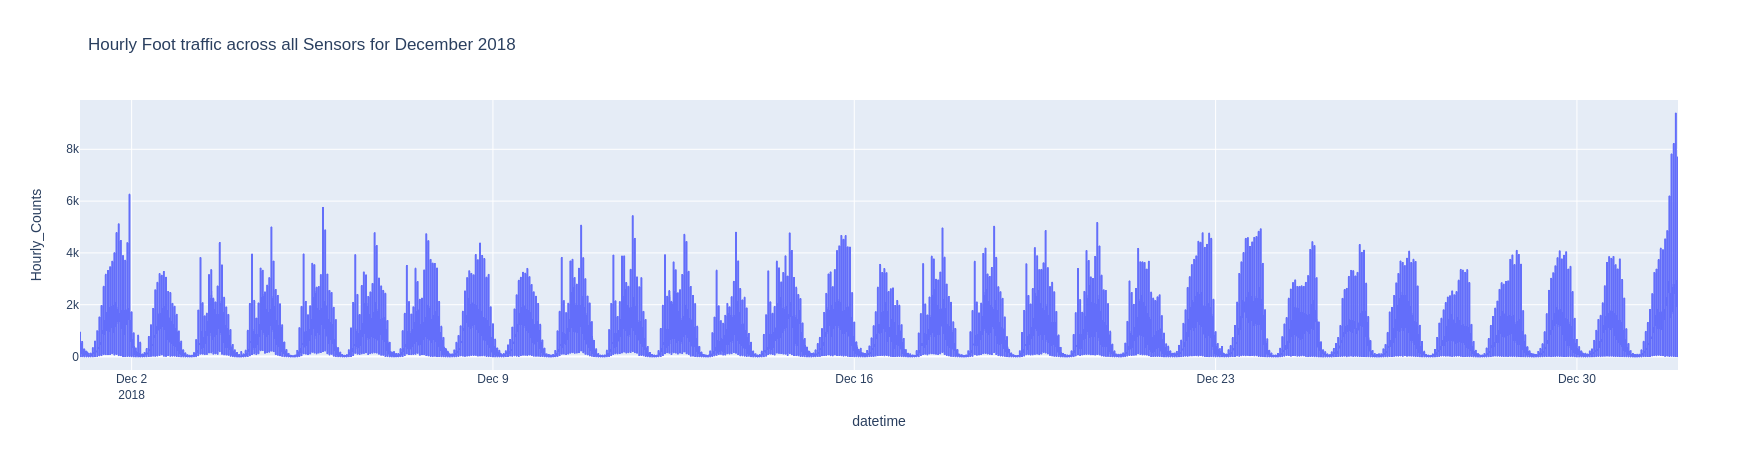

In [4]:
# Initial attempt at plottling sensors
px.line(
    df,
    y="Hourly_Counts",
    x="datetime",
    title="Hourly Foot traffic across all Sensors for December 2018",
)

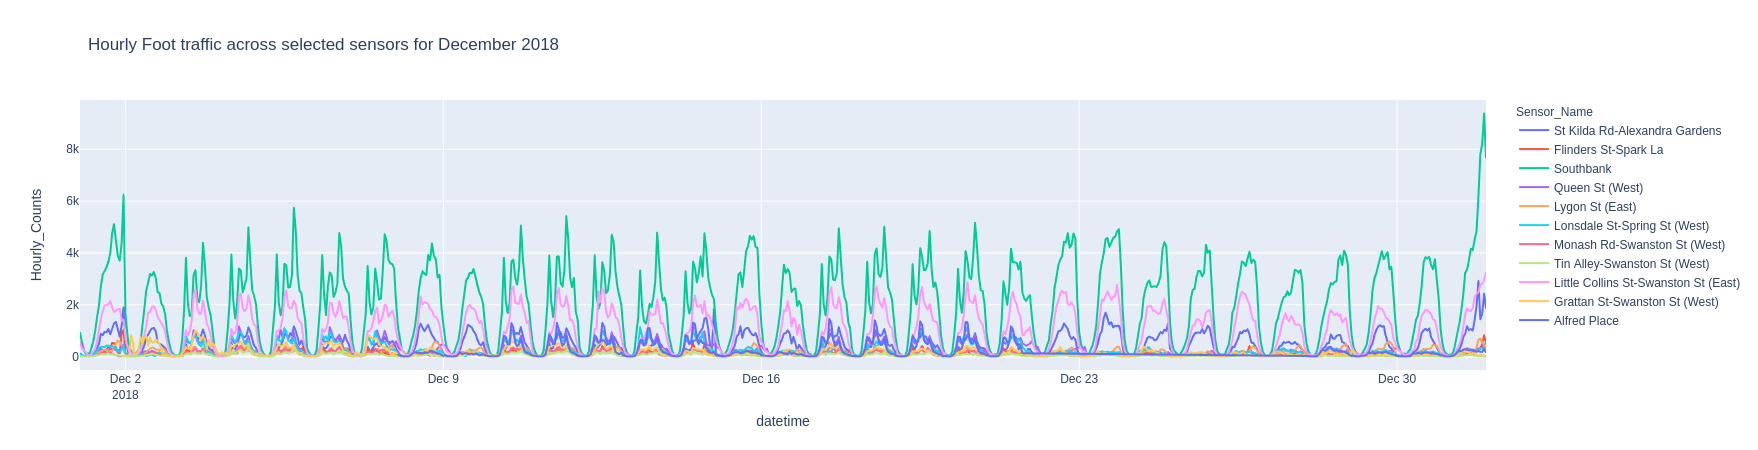

In [5]:
# Initial attempt at plottling sensors
# can do line_group first
px.line(
    df,
    y="Hourly_Counts",
    x="datetime",
    color="Sensor_Name",
    title="Hourly Foot traffic across selected sensors for December 2018",
)

Observations:
* plotting on same plot makes readability hard 
* hard to compare the relative shape due to different scales
* annoying having to keep re-running filtering cell with new parameters

In [6]:
# let's create a filtering function to make this easier to apply
# (later on we'll extend to make more flexible)


def filter_df(df, year=None, month=None, sensors=None):
    if year is not None:
        df = df[df["Year"] == year]
    if month is not None:
        df = df[df["Month"] == month]
    if sensors is not None:
        df = df[df["Sensor_Name"].isin(set(sensor))]
    return df

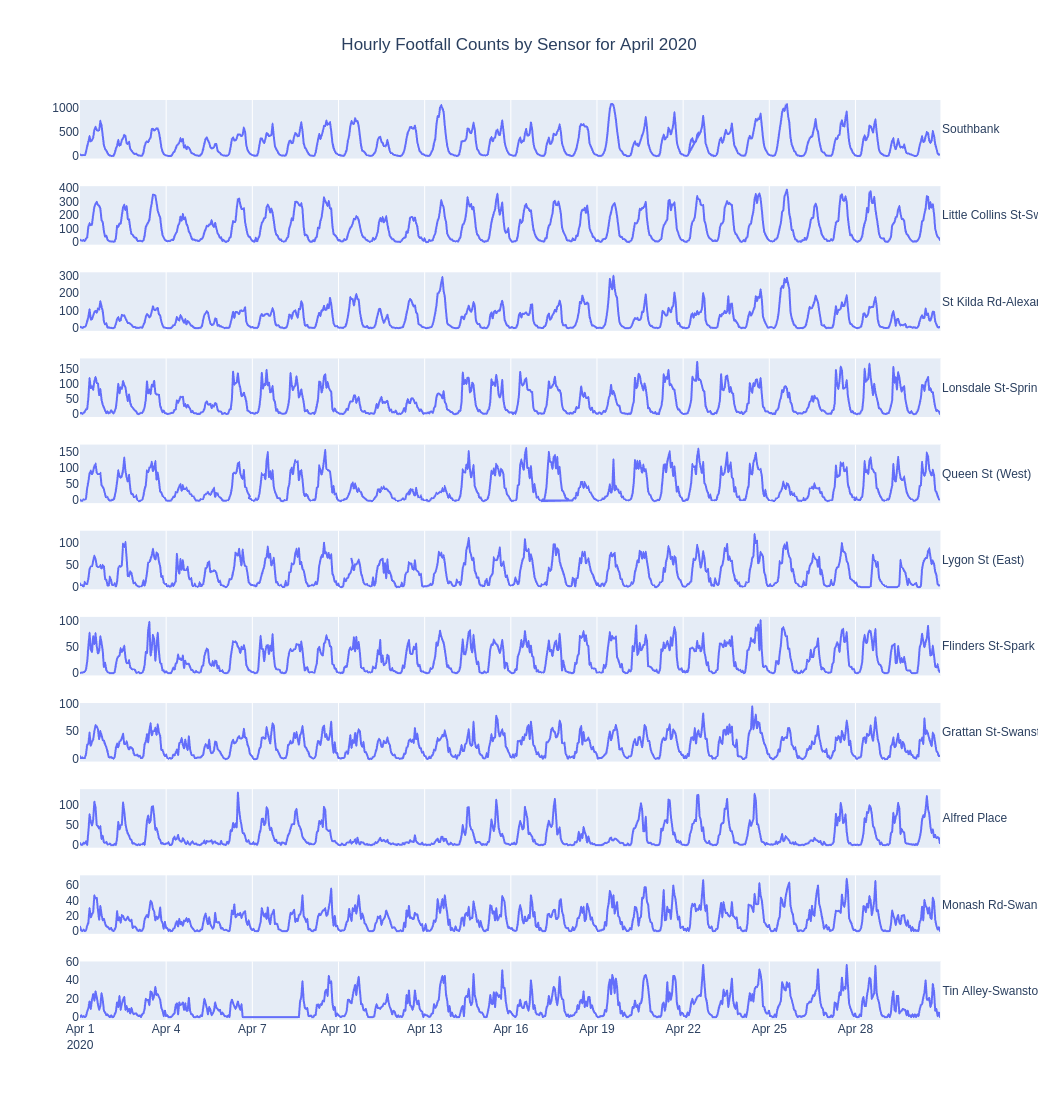

In [105]:
plot_sensors(foot_df, sensor=sensors, year=2020, month="April", same_yscale=True)

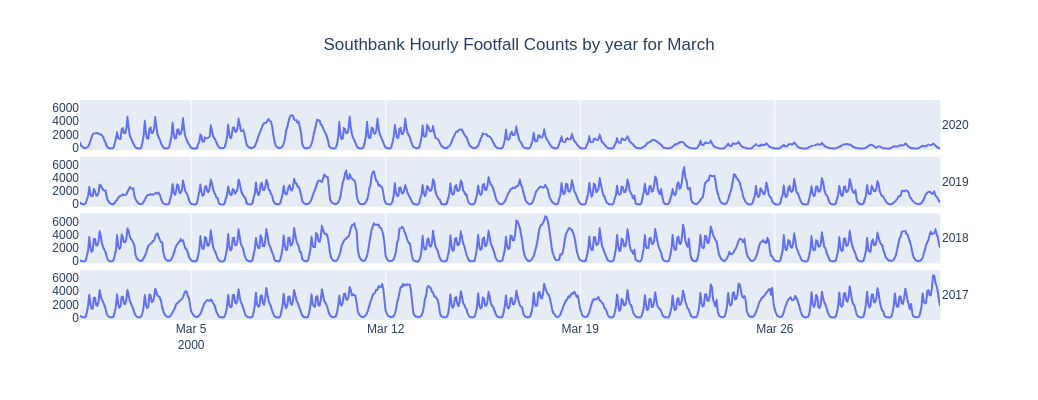

In [106]:
plot_years(foot_df, sensor="Southbank", month="March", same_yscale=False)

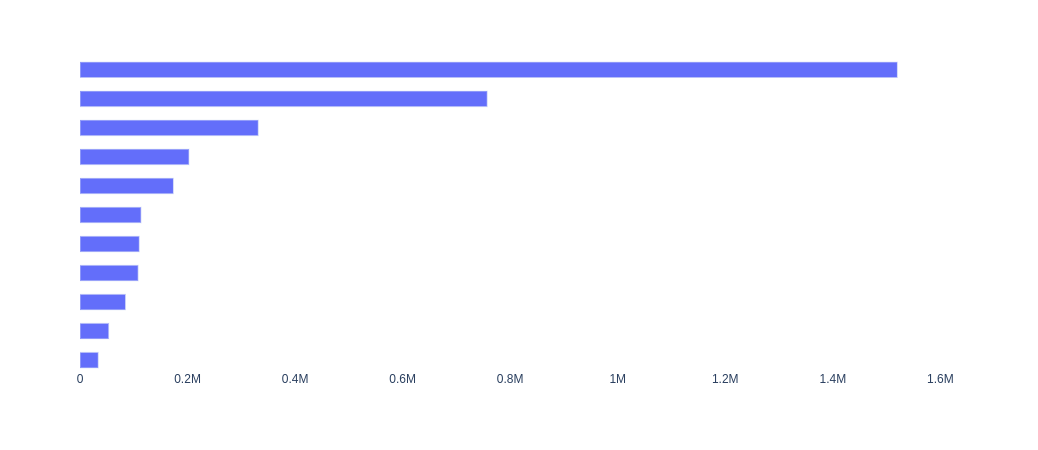

In [107]:
# this could be used to plot alongside the sensor line plots
# TODO: improve hover labels 
def make_facet_bars(df, height=None):
    fig = px.bar(df.groupby("Sensor_Name")["Hourly_Counts"].sum().sort_values(ascending=False).reset_index(), facet_row="Sensor_Name", orientation="h", height=height)
    fig.update_yaxes(matches=None, title_text=None, showticklabels=False)
    fig.update_xaxes(showgrid=False, title_text=None)
    fig.update_layout(showlegend=False, plot_bgcolor="white")
    fig.for_each_annotation(lambda a: a.update(text=""))
    return fig

make_facet_bars(df)

## Protype Development

ipywidgets
